In [ ]:
import numpy as np
import pandas as pd
import missingno as mano
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import plotly.express as px
from scipy.stats import kurtosis
import scipy.stats as stats

In [ ]:
#changes csv file
df=pd.read_csv("cirrhosis.csv")

In [ ]:
# !pip install -U scikit-learn


# ***Fixing Data Types and Renaming Columns***

In [ ]:
df.info() #First step of EDA to check out what type every column is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
df.describe().T #Check statistics of every column

,count,mean,std,min,25%,50%,75%,max
ID,418.0,209.500000,120.810458,1.00,105.2500,209.50,313.75,418.00
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00


In [ ]:
df.isnull().sum() #Checking empty in Columns

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N_Weeks          0
N_Months         0
N_Years          0
dtype: int64

In [ ]:
# Display the column names in your DataFrame
print(df.columns)

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')


In [ ]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
N_Days,400,4500,1012,1925,1504
Status,D,C,D,D,CL
Drug,D-penicillamine,D-penicillamine,D-penicillamine,D-penicillamine,Placebo
Age,21464,20617,25594,19994,13918
Sex,F,F,M,F,F
Ascites,Y,N,N,N,N
Hepatomegaly,Y,Y,N,Y,Y
Spiders,Y,Y,N,Y,Y
Edema,Y,N,S,S,N


In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape) #To know number of duplicate rows

number of duplicate rows:  (0, 20)


In [ ]:
# df.rename(columns={"Country of Origin": "Country", "Farm Name": "Farm_Name", "Lot Number": "Lot_Number",
#                "Total Cup Points": "Total_Cup_Points", "Moisture Percentage": "Moisture_Percentage",
#                   "Category Two Defects": "Category_Two_Defects", "Certification Body": "Certification_Body", "Certification Address": "Certification_Address", "Certification Contact": "Certification_Contact"},  inplace=True)

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

ID: 418 distinct values
N_Days: 399 distinct values
Status: 3 distinct values
Drug: 3 distinct values
Age: 344 distinct values
Sex: 2 distinct values
Ascites: 3 distinct values
Hepatomegaly: 3 distinct values
Spiders: 3 distinct values
Edema: 3 distinct values
Bilirubin: 98 distinct values
Cholesterol: 202 distinct values
Albumin: 154 distinct values
Copper: 159 distinct values
Alk_Phos: 296 distinct values
SGOT: 180 distinct values
Tryglicerides: 147 distinct values
Platelets: 244 distinct values
Prothrombin: 49 distinct values
Stage: 5 distinct values


In [ ]:
#df.Country.value_counts() # To know most counts in columns for example Most common countries

# ***MVA***

In [ ]:
df.isnull().sum() #Checking empty in Columns

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<Axes: >

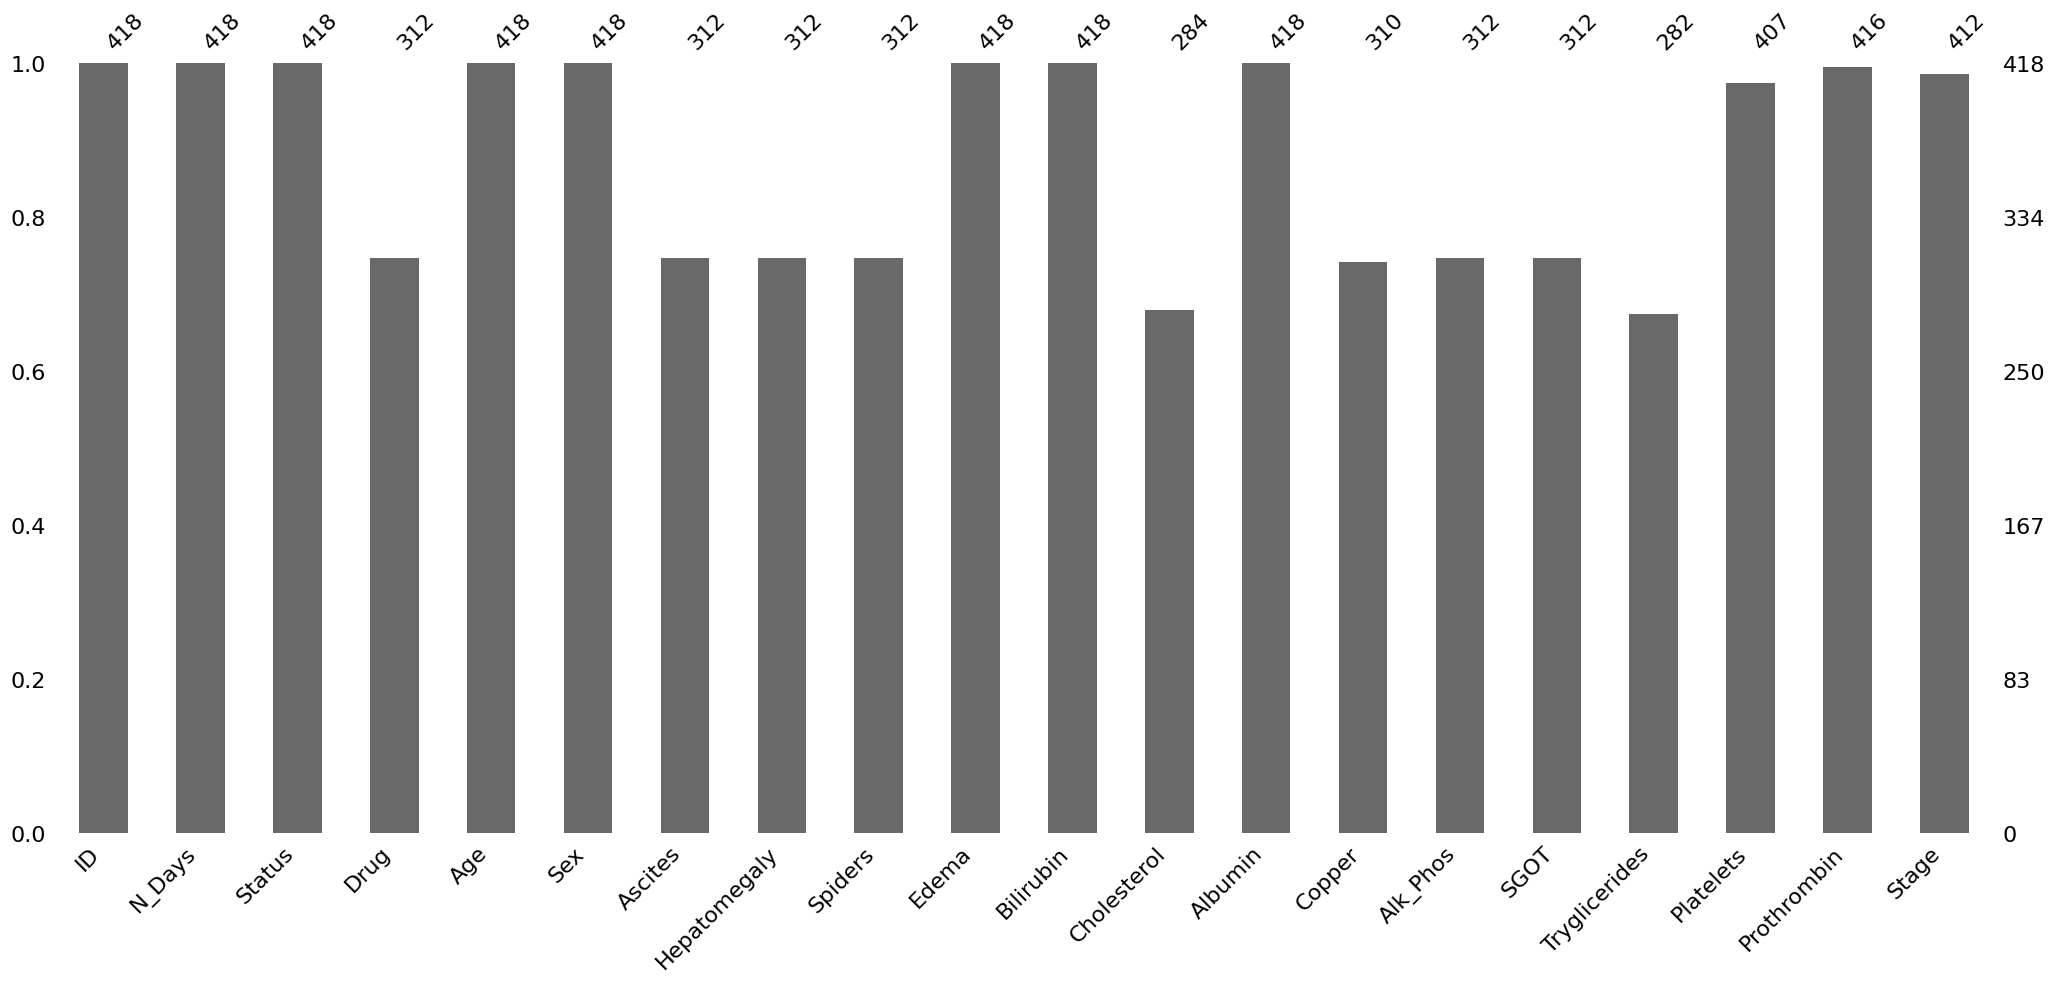

In [ ]:
mano.bar(df)

<Axes: >

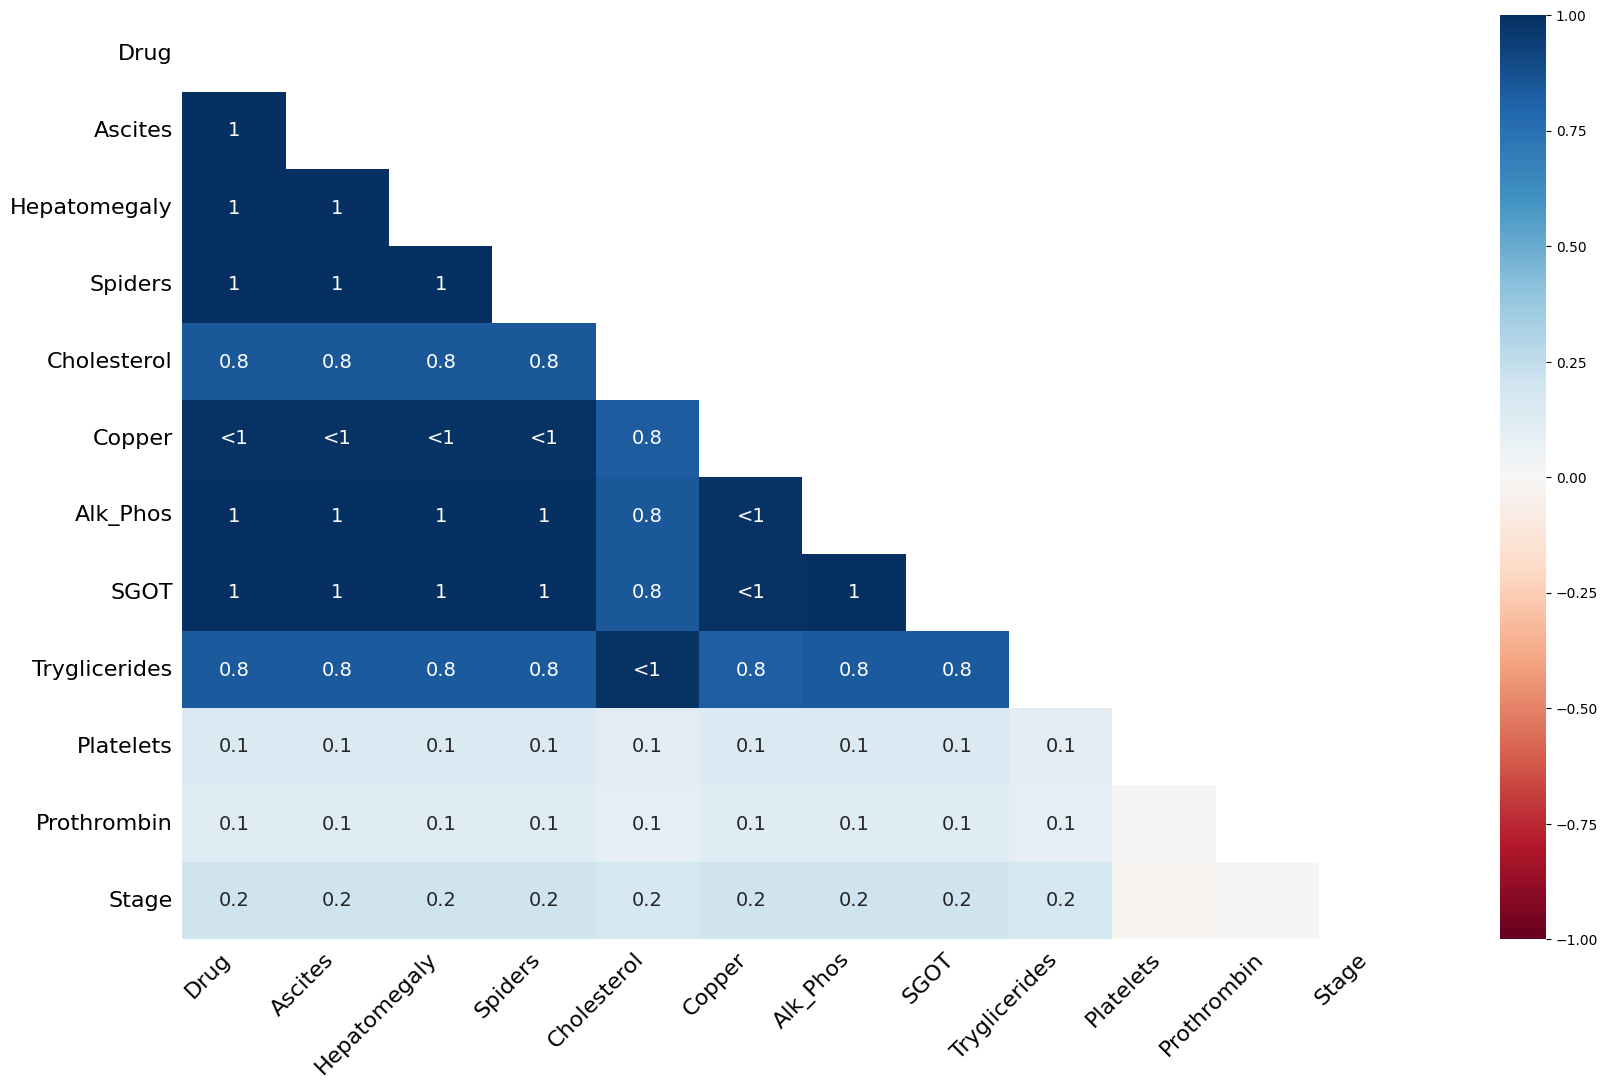

In [ ]:
mano.heatmap(df) # measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

<Axes: >

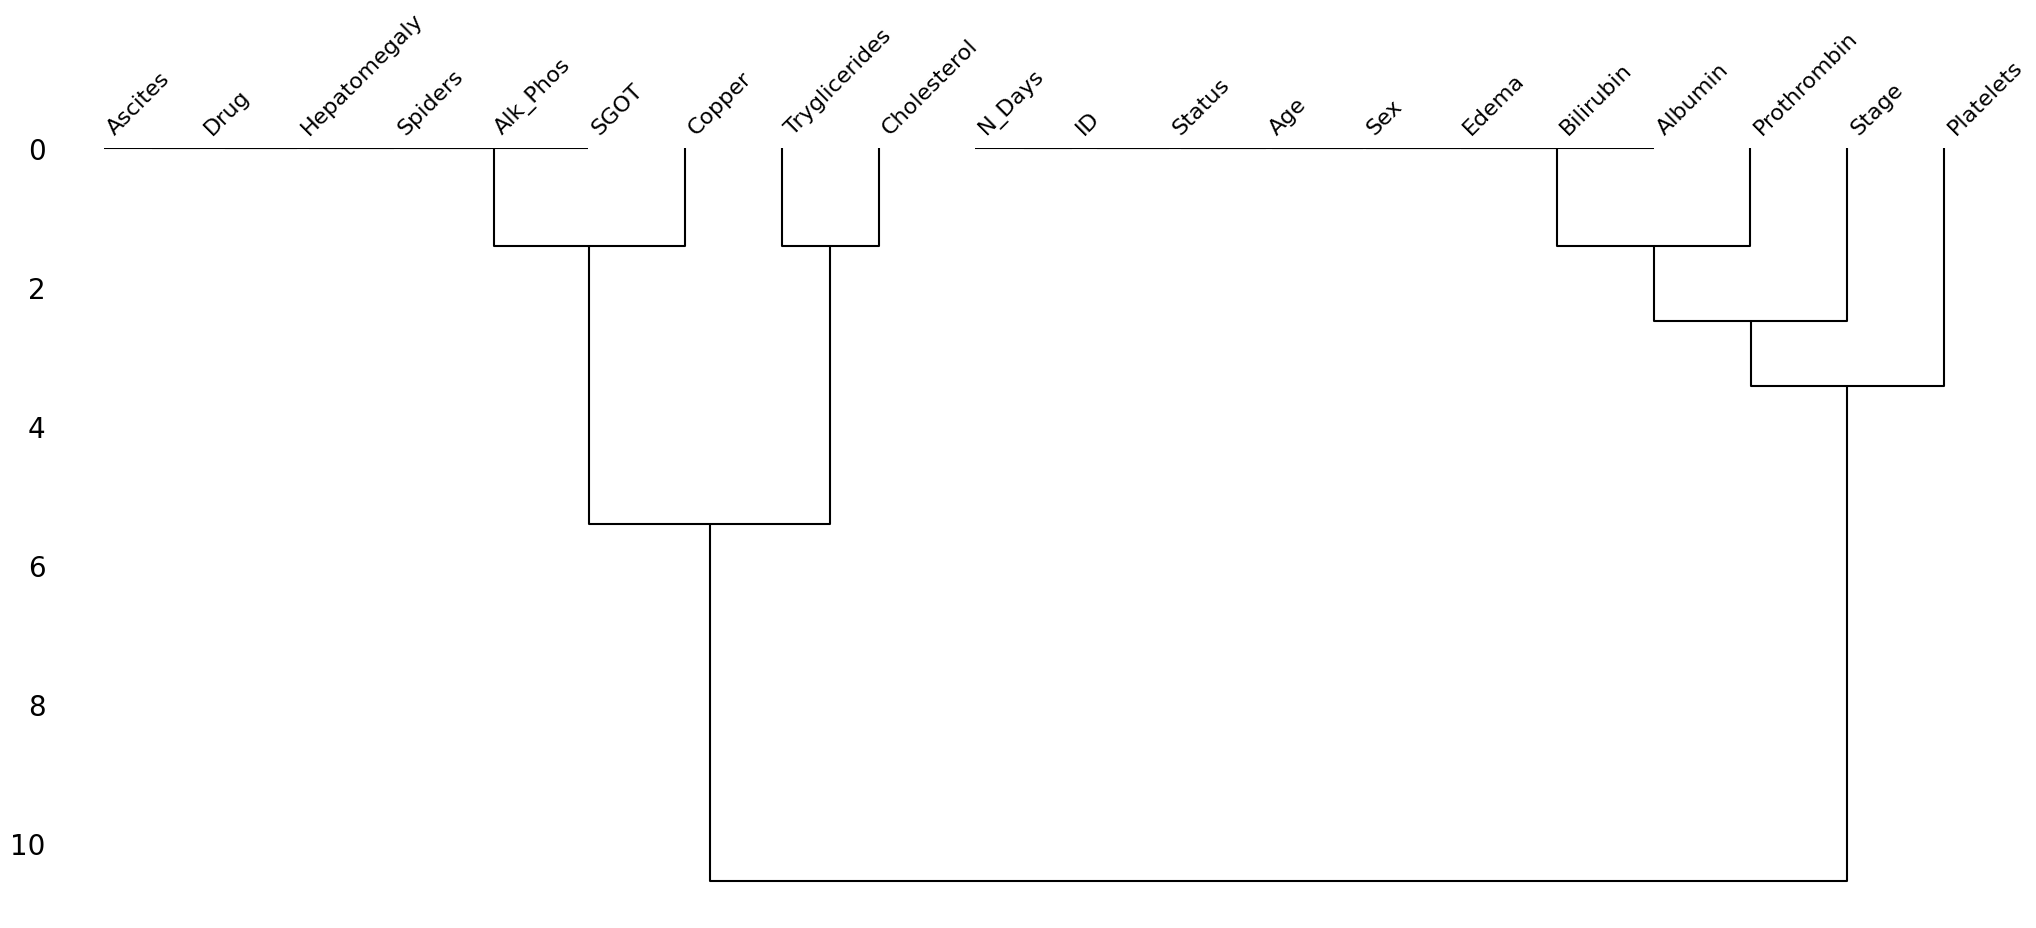

In [ ]:
mano.dendrogram(df)

In [ ]:
df.drop('ID', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [ ]:
df.replace('NA', '', inplace=True)

In [ ]:
# DRUG MODE BECAUSE CATEGORICAL

df['Drug'].fillna(df['Drug'].mode().iloc[0], inplace=True)

In [ ]:
from sklearn.impute import IterativeImputer

df['Ascites'] = df['Ascites'].map({'Y': 1, 'N': 0})
df['Hepatomegaly'] = df['Hepatomegaly'].map({'Y': 1, 'N': 0})
df['Spiders'] = df['Spiders'].map({'Y': 1, 'N': 0})
df['Edema'] = df['Edema'].map({'Y': 1, 'N': 0})

In [ ]:
df['Age'] = (df['Age'] / 365.25).round().astype(int)

In [ ]:
from sklearn.impute import IterativeImputer

# Assuming your dataset is in a variable called 'df' and 'Ascites' is the column you want to impute
mice_imputer = IterativeImputer()

# Use the 'values' attribute to convert the Pandas Series to a NumPy array
df['Bilirubin'] = mice_imputer.fit_transform(df['Bilirubin'].values.reshape(-1, 1))
df['Cholesterol'] = mice_imputer.fit_transform(df['Cholesterol'].values.reshape(-1, 1))
df['Copper'] = mice_imputer.fit_transform(df['Copper'].values.reshape(-1, 1))
df['Alk_Phos'] = mice_imputer.fit_transform(df['Alk_Phos'].values.reshape(-1, 1))
df['Bilirubin'] = mice_imputer.fit_transform(df['Bilirubin'].values.reshape(-1, 1))
df['SGOT'] = mice_imputer.fit_transform(df['SGOT'].values.reshape(-1, 1))
df['Tryglicerides'] = mice_imputer.fit_transform(df['Tryglicerides'].values.reshape(-1, 1))
df['Platelets'] = mice_imputer.fit_transform(df['Platelets'].values.reshape(-1, 1))
df['Prothrombin'] = mice_imputer.fit_transform(df['Prothrombin'].values.reshape(-1, 1))

In [ ]:
from sklearn.impute import KNNImputer

# Assuming your dataset is in a variable called 'df'

# Columns with binary values (0 or 1)
binary_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Columns with values 1 through 5
stages_column = ['Stage']

# Create a KNNImputer for binary columns
knn_imputer_binary = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df[binary_columns] = knn_imputer_binary.fit_transform(df[binary_columns])

# Create a KNNImputer for 'Stages'
knn_imputer_stages = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
df[stages_column] = knn_imputer_stages.fit_transform(df[stages_column])
df[stages_column] = df[stages_column].round().astype(int)  # Round and convert to integers


In [ ]:
binary_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df[binary_columns] = df[binary_columns].round().astype(int)
df[binary_columns] = df[binary_columns].replace({0: 'No', 1: 'Yes'})

In [ ]:
df.isnull().sum() #Checking empty in Columns after filling all missing values

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# ***SKEWNESS DETECTION, ANOVA TEST, SCATTERPLOTS***

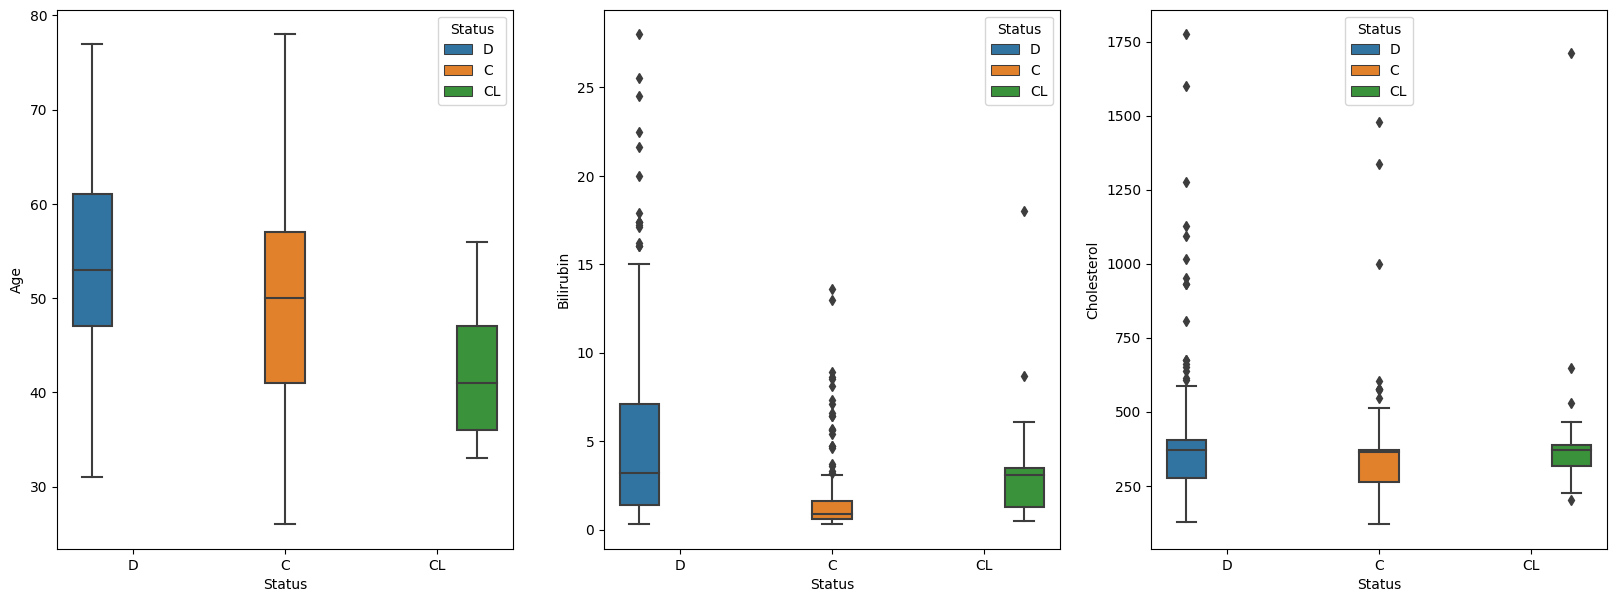

In [ ]:
# status of the patient C (censored), CL (censored due to liver tx), or D (death)

fig, axes = plt.subplots(1, 3, figsize = (20, 7))

sns.boxplot(ax = axes[0], data = df, x = 'Status', y = 'Age', hue = 'Status');
sns.boxplot(ax = axes[1], data = df, x = 'Status', y = 'Bilirubin', hue = 'Status');
sns.boxplot(ax = axes[2], data = df, x = 'Status', y = 'Cholesterol', hue = 'Status');

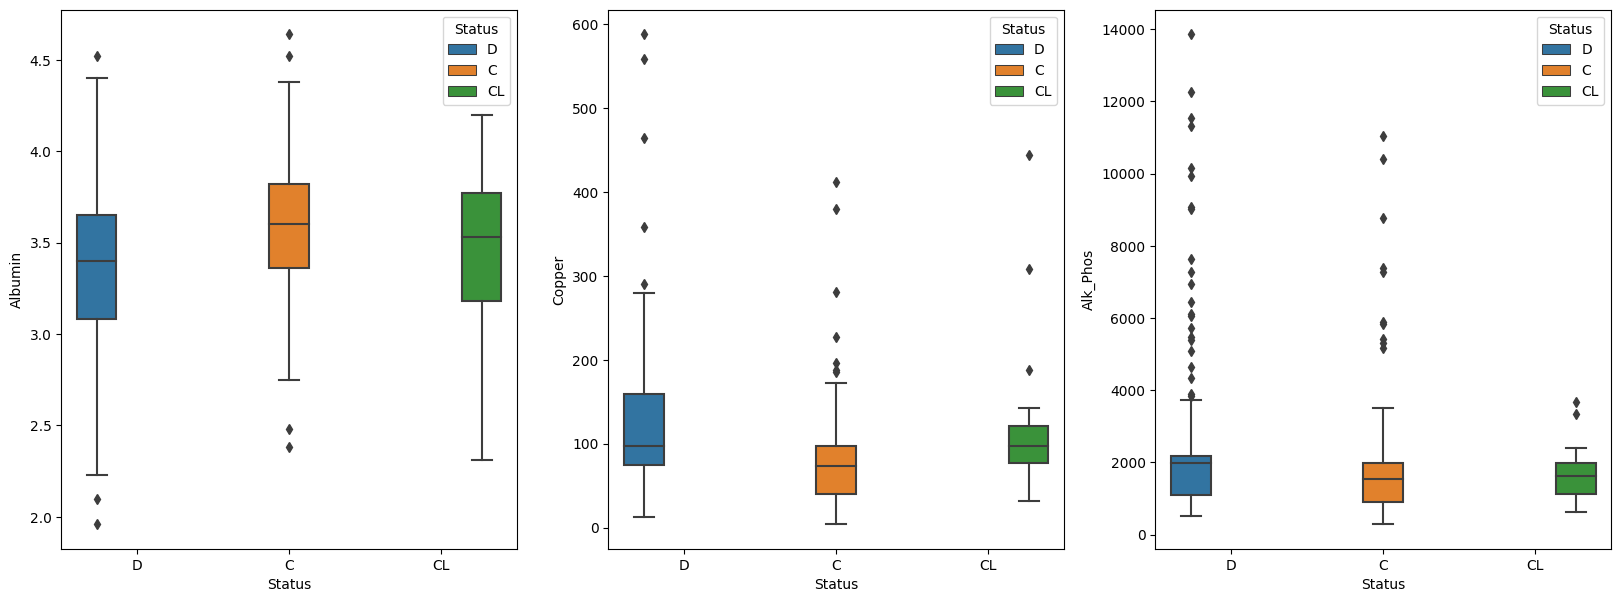

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7))

sns.boxplot(ax = axes[0], data = df, x = 'Status', y = 'Albumin', hue = 'Status');
sns.boxplot(ax = axes[1], data = df, x = 'Status', y = 'Copper', hue = 'Status');
sns.boxplot(ax = axes[2], data = df, x = 'Status', y = 'Alk_Phos', hue = 'Status');

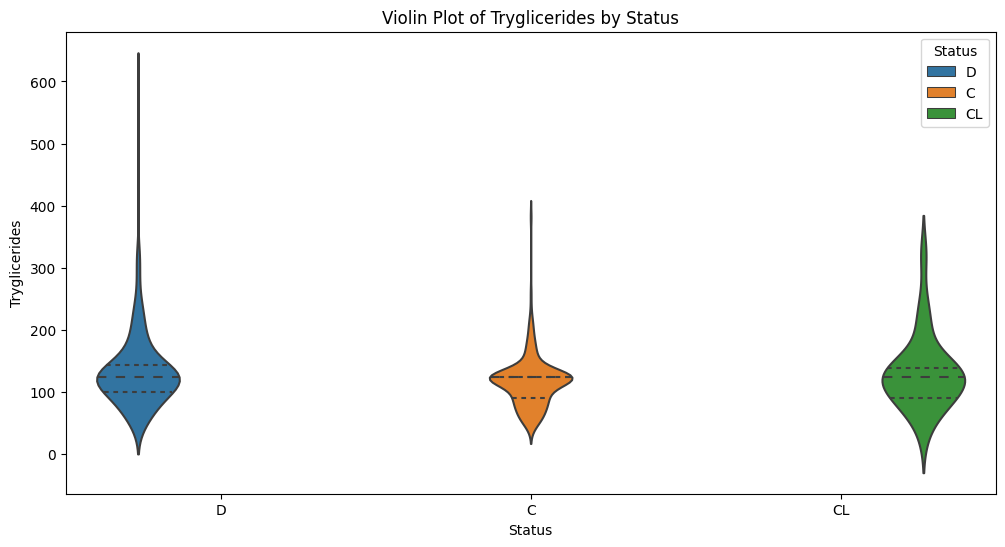

In [ ]:
# Assuming your DataFrame is in a variable called 'df'
plt.figure(figsize=(12, 6))
sns.violinplot(x='Status', y='Tryglicerides', data=df, hue='Status', inner='quartile')

# Set plot labels and title
plt.xlabel('Status')
plt.ylabel('Tryglicerides')
plt.title('Violin Plot of Tryglicerides by Status')

# Show the plot
plt.show()

In [ ]:


# Create a contingency table
contingency_table = pd.crosstab(index=[df['Ascites'], df['Hepatomegaly'], df['Spiders'], df['Edema']], columns=df['Stage'])

table = PrettyTable()
table.field_names = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema'] + [f'Stage {i}' for i in range(1, 5)]

for row in contingency_table.itertuples():
    table.add_row(list(row.Index) + list(row[1:]))

print(table)

+---------+--------------+---------+-------+---------+---------+---------+---------+
| Ascites | Hepatomegaly | Spiders | Edema | Stage 1 | Stage 2 | Stage 3 | Stage 4 |
+---------+--------------+---------+-------+---------+---------+---------+---------+
|    No   |      No      |    No   |   No  |    19   |    67   |    92   |    38   |
|    No   |      No      |   Yes   |   No  |    1    |    5    |    10   |    4    |
|    No   |      No      |   Yes   |  Yes  |    0    |    0    |    2    |    0    |
|    No   |     Yes      |    No   |   No  |    1    |    15   |    38   |    47   |
|    No   |     Yes      |   Yes   |   No  |    0    |    3    |    17   |    31   |
|    No   |     Yes      |   Yes   |  Yes  |    0    |    0    |    1    |    3    |
|   Yes   |      No      |    No   |   No  |    0    |    0    |    1    |    1    |
|   Yes   |      No      |    No   |  Yes  |    0    |    0    |    0    |    2    |
|   Yes   |      No      |   Yes   |  Yes  |    0    |    0    | 

In [ ]:


fig = px.pie(df, names='Stage', title='Liver Scarring Stage')
fig.show()

In [ ]:
# HISTOGRAM

fig=px.histogram(df, x="Platelets", color="Status")
fig.show()

In [ ]:

print(kurtosis(df["Platelets"], axis=0, bias=True))

# Positive Kurtosis (greater than 0): Indicates that the distribution has heavier tails and a more peaked shape than a normal distribution.

0.9414961522714456


In [ ]:
# HISTOGRAM

fig=px.histogram(df, x="Prothrombin", color="Status")
fig.show()

In [ ]:
print(kurtosis(df["Prothrombin"], axis=0, bias=True))

# Positive Kurtosis (greater than 0): Indicates that the distribution has heavier tails and a more peaked shape than a normal distribution.

9.968155921752706


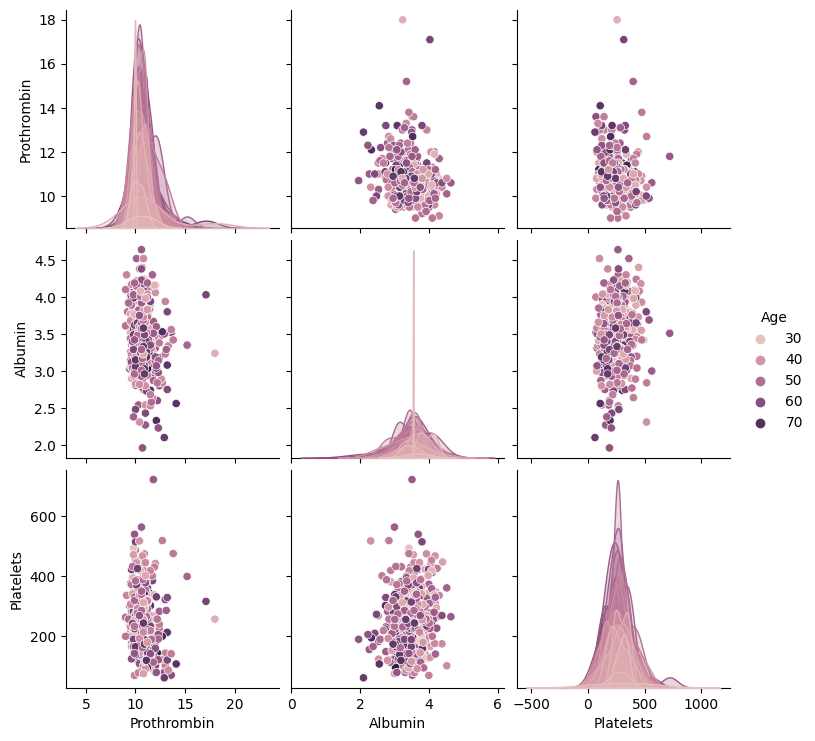

In [ ]:
%matplotlib inline
# create scatterplot matrix
#hue='quality': The hue parameter is used to color the points based on a categorical variable. In this case, the points are colored based on the 'quality' column.
fig = sns.pairplot(data=df[['Prothrombin', 'Albumin', 'Platelets', 'Age']],
                   hue='Age')

plt.xlabel('Prothrombin')
plt.ylabel('Age')
plt.show()

In [ ]:
# ANOVA TEST HERE


# Perform one-way ANOVA
anova_statistic, p_value = stats.f_oneway(df[df['Drug'] == 'D-penicillamine']['Bilirubin'],
                                           df[df['Drug'] == 'Placebo']['Bilirubin'])

print(f'ANOVA Statistic: {anova_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. There is a significant difference in Bilirubin levels between groups.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in Bilirubin levels between groups.')


ANOVA Statistic: 2.3052842638199063
P-value: 0.1296942716534684
Fail to reject the null hypothesis. There is no significant difference in Bilirubin levels between groups.


# ***CORRELATION AND NEW DATASET***

<ipython-input-242-89976b561c71>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



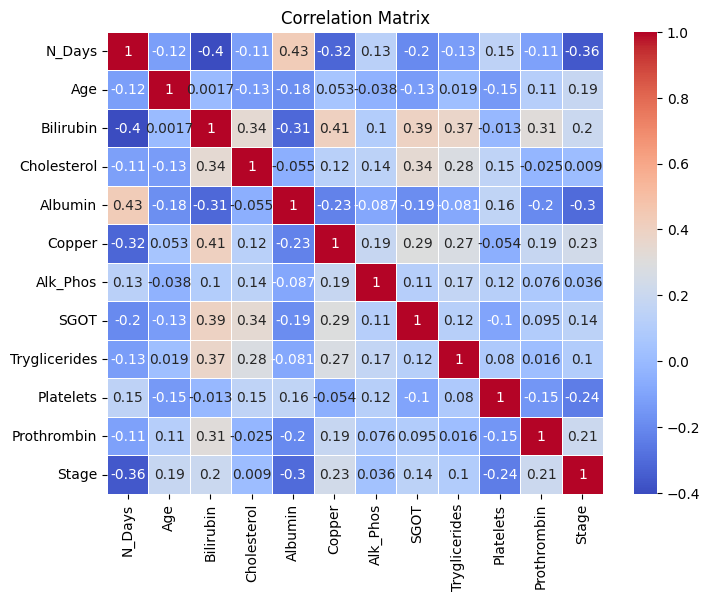

In [ ]:

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [ ]:
df['N_Days'] = pd.to_numeric(df['N_Days'], errors='coerce')

days_in_week = 7
days_in_month = 30
days_in_year = 365

df['N_Weeks'] = df['N_Days'] / days_in_week
df['N_Months'] = df['N_Days'] / days_in_month
df['N_Years'] = df['N_Days'] / days_in_year

df[['N_Weeks', 'N_Months', 'N_Years']] = df[['N_Weeks', 'N_Months', 'N_Years']].round(2)

print(df[['N_Days', 'N_Weeks', 'N_Months', 'N_Years']])

     N_Days  N_Weeks  N_Months  N_Years
0       400    57.14     13.33     1.10
1      4500   642.86    150.00    12.33
2      1012   144.57     33.73     2.77
3      1925   275.00     64.17     5.27
4      1504   214.86     50.13     4.12
..      ...      ...       ...      ...
413     681    97.29     22.70     1.87
414    1103   157.57     36.77     3.02
415    1055   150.71     35.17     2.89
416     691    98.71     23.03     1.89
417     976   139.43     32.53     2.67

[418 rows x 4 columns]


In [ ]:
df.to_excel('Cirrhosis_Cleaned.xlsx', index=False)